In [2]:
!pip install mlflow imbalanced-learn

In [7]:
import os
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from itertools import product

# Paths to data
train_path = "data/processed/train.csv"
val_path = "data/processed/val.csv"
test_path = "data/processed/test.csv"

# Load data
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

# Preprocessing function
def preprocess_data(train_df, val_df, test_df):
    X_train, y_train = train_df['text'], train_df['label']
    X_val, y_val = val_df['text'], val_df['label']
    X_test, y_test = test_df['text'], test_df['label']

    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_val_tfidf, X_test_tfidf, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(df_train, df_val, df_test)

In [8]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
experiment = mlflow.set_experiment("SMS Spam Detection")
experiment_id = experiment.experiment_id
print("Experiment ID:", experiment_id)

Experiment ID: 476961090172881872


### Logistic Regression

In [10]:
log_reg = LogisticRegression()
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500]
}

best_log_reg = train_model(X_train, X_val, y_train, y_val, log_reg, log_reg_params)

2025/03/20 13:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/970e8845c47947e596d10e5940953afd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e52b8046496b46d98cc27bc067997314
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/48f84ec758864c66bd8ba6bcdd901729
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6e88191af454409588218ca50526859c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7be8d1d4ee154d788d97e40fcf4d635f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7e56ea2c68df43a79f6c0c73ca12f89b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/20a3f1fbc15d4730bb967d163816b01a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a24c00c6cda545bd889a1a11ec53ca77
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4f32402ca035490daf82cc1c991fbc18
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dec0732abd374f3da9ed5b4e211eb5a7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:25:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d99d505e5a5142b8b7e786a3d5b755b7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a1c1c7003f4f46f083f4e0fab7b153e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


/Users/ananyasinha/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
2025/03/20 13:26:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bd2f9dc5f82147d598f308be3a99be57
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7a8c35058def48199031c0be8216cb75
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a437514397204e969a2dd9492bcb3fc6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/30856fa1853d46efbba9d7161ff7ad3a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c544d63ff9e4460a91c7ec98d8b0c91c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/39b48dc0a67544f0a06dc480fe494cc0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/22e518fc1f874d7d95d09807bc22bd99
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/af05f608c38545ec934d1017caec28ec
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f067efb702fd4478adbba20042a406f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/424cc1d828de4dbba8c34472fa5475c7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f3d9932ac63e480e8acf6963873dde17
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:26:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/625cdff2c5514ceb817fbdafebcdae5c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/57649b2e695d40c6bb4aaf51368d15e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/fb007e382cc34a83828b0ce50467b373
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/56dd285f931549bf83e9c5d4191353a8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d3de534365f64f11b47b9fce38443acc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/ac2794a8c3fa4b7088af208508e3c1d6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4bd01ec4ec734074b9c6dbdd6ee26a2d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


### Random Forest Classifier

In [11]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

best_rf = train_model(X_train, X_val, y_train, y_val, rf, rf_params)

2025/03/20 13:27:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/20201d5d9c024780b3ee4293f8ee68a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/ccaef243842c432e8ce578e3f0d73bb5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a1dff090d3174c4f93f755a5967227d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:27:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/cfddf9f661f249af8418c322ecb311e2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2069bc3495ea4b74a8b1465c03314e6f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a2f6d0a4ea784a43947cf98e3ad073b1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6fd131fe0fc44364b46a672a5d194bb1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/909d50b409d8422793911c9e867f6b9b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5f6d81d78d474bdb8335a6b87e2e25e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/90a301dcf163415ab43b84e556c18465
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7d3b6a1ca1ed43e79c36c05511277735
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/eda8e036dcb44d679b4ef12a52b55455
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6d7c4b0da6b7470fab6a0a22622eb641
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2c199e66ec8f4d57b83bbb6c4ea189ff
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/500a35db5a184e0fa6200e650850a355
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:28:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/900735f472244c399e969262b82a4501
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7b27e5acac38459c837a89d4e718e58c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/1bba3a868ba040ba8e1e69a655b618a2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/38056be4fdbc43039df03c299cbccb0f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/1d767887812d4cb2a8081503b816722b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/da8801432ff14e33bb4ddb69b3e66191
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7618a803de484a5d8385ca33dbb4f14e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/51a344b8ef7e4683b3a3821f6635caa8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4b2d64e04aa343778bf29b783de304a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a4dd22ff2cd9498fa83a354e4cf385b5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8386116335224ff9ad07feaaf16b51d8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/83cfe038ddea40e881ad55b101da12d2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:29:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/72e25d30bb6442549d7ac18d46d4ae56
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/db6309dda1954617817def565fc3ebcb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/99d6790787104d0282e36a461efdc8ea
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2a9efa0872644573b89c987a880bfb97
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/873b3a908ffe4ecea0c88754b721e1b0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/669f851356434f0fa661c83acbde0004
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/fc4c50b62a5b4778a09348d2bce182b3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5d9f85961cfd45ec8e3c69caf4c969d0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c5c2453395cd4a2e8de9245304c477e6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bd7f23c0c4b34b31a9829e29bdf6538c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/ef2fe17c97694293824d5380ef8aeba2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e76098c15de04b498b7a2cefab651414
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:30:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a3e326a2ba7749339c7c091b3e86436f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/914efa14d2d84000bb3486f96b12a0fe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/150d2b3912444e229db307e9edaef0a0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3ce9adab05f04b0c9c662093e325b07c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9c90aaaf091b47b9a8d3337e2ba2d02c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/cd2cf7499cd846d696b76b148269f28d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/1b9b3eb1ecf248a78febfa9043e177ca
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2f3c9804f3d7490599f61d070dda49b5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9f08a4a2dea946b9b1dde15189a7e316
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/ebb435ea13354ef49bbd429fce44b798
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/667fd14bcc6e461cb73b35eb96237adf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/05d6100bf2eb4386b4512baf70506fe6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:31:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9b85da5a30814ecba5491da2d2e09118
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b9c1a727ddb447d894e4f8fb002a6e80
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/0f8b1db72f3144f68a77b68c169e70f1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d52f9cce7a5a4fef8798d071f7bd8553
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/aebf9533628443b6a414993a52530e48
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dcafe59a7d7240df9d65269bc131ab82
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/46ffb6f17c26456f98207764c68e5dff
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/378bbb7e308546489c292a4178e7d53a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/984a86684c2d42f8ae13a34f7b58c567
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/18ec15773a7149638ad839de6da7c284
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6495da79fa9246d687b73bb8429318c6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/86e6a7b666ed43baa3faaeca75007bf1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:32:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e08cdbebe6ef499cad5083a8caee73de
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c6d3df150e68404bb66a5ceebc809f59
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bb6d84ab7d7941a4801a2d931a2bec28
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9feecc5439ef46dabbb45ef5725da867
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a97b733516db436c918a9bcbd6acc436
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3040ecc2c0ee458ab267266159dbb9eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e944036cf70a4458a90941646b405e92
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/80ac87e940974667bc56ee4966876fe1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2a6ded1d4aa64909a3392362bbb4eb25
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/357ec69d81ff47f8be28387b6d312605
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9f392fb29ecd4949b2eab2f1069a49fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3b5ff488efaa4bf2a2714c7391875d76
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:33:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c9860e9349fc46ecaf6d1cf49fc37f5d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a33292ba971e4e6586a2a335098bd118
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6c58ac96a79f4800b14900c56034ec5e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/0e0dc2cbc849419d876fff3e5214ea41
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d3d4372315044e9e90bb067479f0f1a5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d1e7c70c1f084167b61841070e243d50
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/81f3013f73844fc089b2e8712cb842f5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8777496931834d07bb72a50f38396cf4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/91a4d84e4f6d4187a89a48f89b50e8b7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/cd2d02e9daa6449da2f14d165e902a81
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bde171a2f6fc4051a809d0d64fc67ef6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/859176e70f5e4509a4908bf36732cb91
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:34:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5e6e09a1ea53489faf4969cab45d0bd4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7c31e254a17b4490a92cab363c782540
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f749d6b456fd4ecdad810ad2748d492e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9c7c1aa7477d41f68df327d25bfba60d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d1954eb4040b43f6aeecf34f59993c64
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6e0e844fb0f944a49d3a7f6e90c36e12
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d479398e9ed44dfc97ffbcea35d3ef88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/cb08a9dbe50347f8870672be4c0004c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8b6a9d1c27c941b4a09c3a56c257b480
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/548bab824bf849808008f50f5bd8ed14
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/13a3938767214c7fa9990abfc26bcdda
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/9ef75af5d9aa4adda359bae6d923696f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:35:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4acd71b4cd004262950975cfbed2528e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/715fa6b65a3940529817ef762e06e116
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f873535080aa4893b651c38530792a77
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/018a5cbd595e475aa1d8e6feff0cb0e6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/959707d4e85d4cee8a184a71a816ac84
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5b5a30d301a242ed992382be647689ea
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/aa0117fc34e1455f80e618164165cac0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d095ad28ff574de5b459f42a32670091
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/1b4dd50b6fe44fc7abb8794786ae30e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dd27c5811ad549ae8647ac7c23d541fb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a9510c44dc764ea88b1892c8ad1f8fd3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:36:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6e23c4b49c274fefa5ad1e347f24c438
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dac593715c33414aa224a64eb0f6a916
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/55d8ab0778a94f82976de80a537cb801
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/10ce356aab8e4974b089126b96abe099
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f1cd229e0f1b4213a19c1c82962230d1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/90a5cad07a324647a27b225b51626a75
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/517102894e044076b2214031eb2f7529
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4ee795c37136438db8b28ff523a99cb3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b6c1e598e0ec496ab0e9ff4254f5b3c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f847da493d294cb39b4d00bdb22ff690
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/181efec4d6974fc492f6b9f5a6ef833d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/cc160028b9d54388bc5870e3348d0ebe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:37:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/09edb4359e714a49bf502ec0502224d3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c0d9cf1d45e8465eb801ab6e21b6c00a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/db2336335b1b42949615985444bc42ab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e62f6275bff3466faf4224224272bf4d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4467ccdb9af74e0b82be2d386acdd48e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/25a7bd0eefd34bbca208a988e9c06d47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3a49d8bc33b9498b8277c898283780f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8ca52a266713442498039a05d79cced0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8904f96e367541b69c2ef137676d72cf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3aac9784ccaa4371997205514133f762
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/49f8b2229cb94006bd2f8f9b4adb4a43
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:38:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b041aa1d5dad4fb4a0a7dbebb7334614
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b8658f8233d2457697cd7c8df6661ce5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e6e6cf5991674d7f99cacca42c5a9860
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/0e994e938f554733a94d423f4203271a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/98a9c717c34c4bc0ab3c3342004283fb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c7ef51dec76d49859c10d6f1cc22fb9c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2024bb2c697948628a0af3b169b6ed88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c5a38307856d4154a1ac0ab137d24853
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bb606d66b15b4b3c9cc4b1377898cf9c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/02951f6d91b14b32a1a705066140d03a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d98bd7f2f1434a97b2df6f8d8a2b591d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:39:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6f5e5c8ecb93437bac6ab7618d6adb2c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/125f1d1e7ec34622a2082f917510fc50
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f268ef5e131b4f9b927af35a99253d9a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/31eb77c4ccd94afb98038ba0fc08c357
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f2a1e33ad86c4d5d8d35b29b851483e7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b84234bc9b054eec8ff7cdd5819363ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/0ca4efc13b034c69b2cc7b055fb50733
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bb4ec55547514751bc7ec4e92129e7a7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6ebee9c753d144c0894ed0326fe0c824
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5aa61ba648f74ab69a3d9a2619c1ce14
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c5b8d15eee9243bd99afa0ac99435c43
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:40:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3c9db44e9671417abb47283fee585594
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:41:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/1e19145228f840cdb9d207eb3bf7e103
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:41:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5b786f7305a14d019c358613755b6c2e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:41:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/77eeff1b0aa44494b698d80c7303dcb4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d8efe106e23f45ae806b4459aa63f580
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8e1e37228f394dbeb916fc6004ccf66b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 13:41:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/97b45f3ea38d405795ebcf181f55cf0b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


### Gradient Boosting Classifier

In [13]:
gb = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

best_gb = train_model(X_train, X_val, y_train, y_val, gb, gb_params)

2025/03/20 14:48:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bdc9838c7f614e148af811232e02c208
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:48:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5e006eb9582a4ce68358ad58521db738
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/561299969edb4f00adf3cf36baacd6ae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a1865752ade34ed89af894c47fdd650e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/aff4563aa6a04041b1a0ee4dd01db1ee
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7e2c83bbd2664e49a580217d247f14b0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/57757845fe9f40afa645a22a29406e8f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/100a9765861246aaa5297b940468696f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/cf82758a25c94502a00149e809e86a88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2b27141f89984d339d6dc9ef39551f97
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:49:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/77a84135332841da8fcd48e7e92c3928
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/974cc0ed645847c1917cf113904790af
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/ec68ed41979544889a9b42b8c0ea5079
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/5cd918b7193a47abb74d889f355e6bda
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6022138699e04cbab9ae73ac7963cdfd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4a5db48fce394da1acbeca4527920848
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8c7de9990fe74502852651fd6bc5a2e2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/7ba27564679a42c99abf2058a681bcc5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bd1cb4d228474582ae193ac33688cf3e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:50:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d8c2671eb3344bdd9ad3f2fb2e358ef1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/29ea55c1208849cab28d0b91563fe80a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/547c01c26e1345d599b4ff9a1f515337
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bea71e9835064465951e240b4788176d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/fc4baaf8ca364e6f8a170bc20c9c9a6e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dbd0357d18404d478ce38c6fa3f09c4b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/833681246472423c9e2e5623139a4278
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4c868ce7249d4055a7e57aaa4837aac7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3996f65d07144ab5addfdf0215f799d0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:51:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3ef26b72e00442bcbb8e2c9b1e27dc15
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/78c7c9dc3b58419d977b1d45af81a6e1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b9994a7ce2ef4360b1a5f496344f74d8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8e0c3d1f5ab94747892235612d6c7e79
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4738e7630f334647b886e8a7b5216ec7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bc62b217388346d780a34e65722669d7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a98208b526ff41ec905bd6375e4a47ad
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:52:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4d7495e6e45b4cf0873c4017e4e513c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/507bef1d7eb84dd0add4769f0a3f8140
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/46eb42a91195431fb42b2efadb04e987
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/47a8d79f516446899c0a469f761cb59e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/853b4882041640c4be88c21e0efb7d16
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3befbc4967b04c95b465e2f576d62683
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/15029792d7e543fe8441b9b88c8d1b8d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:53:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/1a038067c6484fcfa4cd49f186087bbd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3e6b92eaf6a440a6b6b57ccc4ed4f2f4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a86b4173c3f848f291d845c8d19531e8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b1b36c92ca9346989b8d26c24128560e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2c5eaa6c3b6c4834b07475bd8d413d6e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/93bef2bc41114fa9a99b42fb43e8017a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8a2e8ed5402c49abababfe05f4e3ff58
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/983a9dc4e0454eac934f9c1782bd6493
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:54:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/52f00e3c3ae24255911b27936f384698
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:55:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8ad97fe62fd74d1d960290daf98b41fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:55:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/c3d35072e45341799cb2b530d61c854f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:55:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dc74fefa85aa433ab1647e7db29c9d50
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:55:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/68b91a4f825042d7b33fcc3e7e08841e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:55:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/d5054e51b82e4fdeb3470ef15d1f2b1c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:55:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/70815edc50034204a2d917665ae1343c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:56:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/dda2bb4f4af741e68ce74a5c57dc8921
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:56:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b618df5d21734882b7e43384ed47a060
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:56:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3c8d0b4eba604034a9d53d4431004978
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:56:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/441f848903b1480da016231eb0109d78
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:56:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8d12a78f2e594ac99972785226261d62
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:57:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/e70f05df55fe455c8e1ab48e4227c491
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:57:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a1d5cc1b86154a308373cf04b2bb464b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:57:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/4a9060ecfb5241a4b6410e59cb82a622
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:57:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/8a4ce0a2d5c1409a8907e2ba4777c3ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:57:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/31a00b4f625d41548b6a9c9bf2520af6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:58:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/bac15f0dbe0443559d668c9f9bce368d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:58:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2fcb5a1f78fb4b709f354281bb25e844
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:58:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a3b69d3fc1144cb8bbeb3aabea0aa4be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:58:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/fffb24d0dbdb460a9d7ce2eabf91c30d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:58:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/6c251e8293b1451ea68fd533794624d6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:59:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/f929618e8014488f9dc62e60ff07b9f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:59:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3fb90a52570a40019dce60c073f9fa01
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:59:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/08c228b7eeaf4d9dbf8e5fe52b19454b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:59:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/a93b54c9c278434c853beb874d873194
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:59:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/2a2a1d640de34fb491d4d9046cc50864
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 14:59:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/3c0ae6f3fb1745e8aacf08d154a1c8c0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 15:00:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/092de2c49942497db78dc91f879aead8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 15:00:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/163d068f84ab4756acf89c0abd8ee61f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


2025/03/20 15:00:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/476961090172881872/runs/b6213cbc31b24502904802fe0249c308
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/476961090172881872


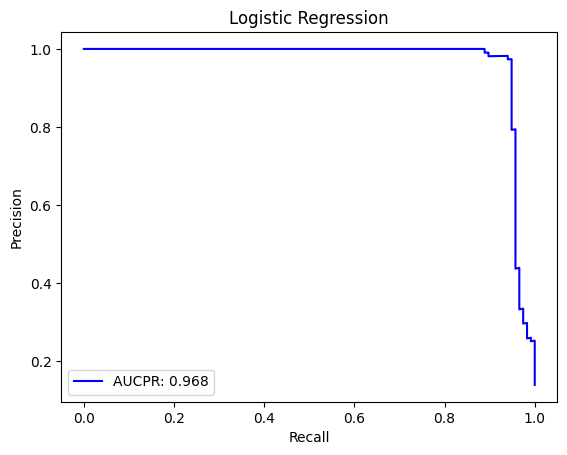

Area under the PR Curve (AUCPR) for Logistic Regression: 0.968


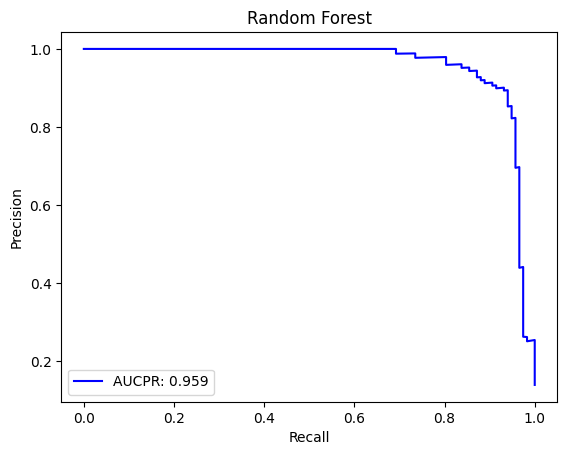

Area under the PR Curve (AUCPR) for Random Forest: 0.959


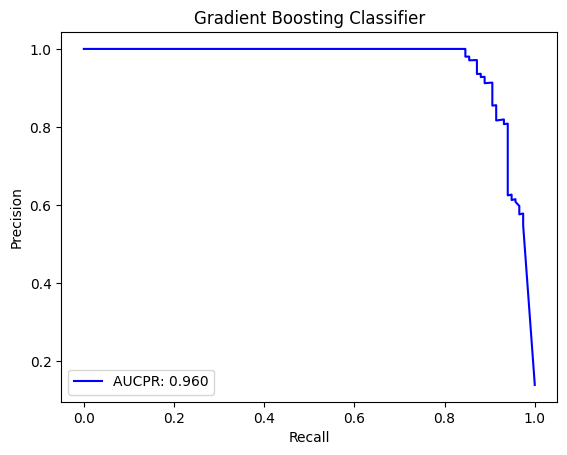

Area under the PR Curve (AUCPR) for Gradient Boosting Classifier: 0.960


In [14]:
def plot_pr_curve(model, X_test, y_test, title):
    y_test_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    aucpr = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision, color='blue', label=f'AUCPR: {aucpr:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.show()

    print(f"Area under the PR Curve (AUCPR) for {title}: {aucpr:.3f}")

plot_pr_curve(best_log_reg, X_test, y_test, "Logistic Regression")
plot_pr_curve(best_rf, X_test, y_test, "Random Forest")
plot_pr_curve(best_gb, X_test, y_test, "Gradient Boosting Classifier")

The best model performance as per the AUC PR is of Logistic Regression